<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 03:  Machine Learning classification**

## **Outline**

1. [Ejercicio 1. Curva de aprendizaje](#eje1)
2. [Ejercicio 2. Leave-one-out](#eje2)
3. [Ejercicio 3. Stratified Classifier](#eje3)





In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/UIS/IA/ai-uis-student/talleres20202')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/UIS/IA/ai-uis-student/talleres20202


---
#### Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.
---

---
## **Dataset de Lesiones en la Columna Vertebral**

En los siguientes puntos vamos a explorar un dataset que contiene los datos de 310 pacientes relacionados con afecciones de la columna vertebral. El dataset contiene un total de 7 atributos que caracterizan a cada paciente, con variables que caracterizan alguna relación biomecánica, como: 

- lumbar_lordosis_angle
- pelvic_tilt
- pelvic_incidence
- ... entre otras

Cada uno de los casos registrados está categorizado de acuerdo a criterios de ortopedia y resultando en los siguientes diagnósticos: "normal", "disk hernia" (hernia discal) o "spondilolysthesis" (espondilolistesis). Observe el dataset en las siguientes lineas y tenga en cuenta el `dataframe` donde quedaron almacenados los valores para ser trabajados en los siguientes puntos. 

[Fuente](https://www.kaggle.com/caesarlupum/vertebralcolumndataset)

---

(310, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,clases
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1


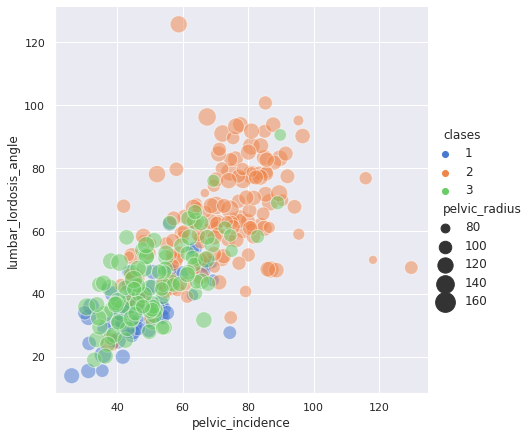

In [ ]:
#@title **Lesiones en la columna**
variable_x = "pelvic_incidence" #@param {type:"string"}
variable_y = "lumbar_lordosis_angle" #@param {type:"string"}
variable_s = "pelvic_radius" #@param {type:"string"}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()


d = pd.read_csv("./misc/column_3C.csv",sep=",")
clases = {'Hernia': 1, 'Spondylolisthesis': 2, 'Normal': 3}
d.clases = [clases[item] for item in d.clases]
vals = np.random.permutation(d.values)

sns.relplot(x=variable_x, y=variable_y, hue="clases", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=d)

print(d.shape)
d.head(2)

# **Ejercicio 1: Exploración de parametros**  <a name="eje1"></a>

Uno de los grandes desafios en machine learning es ajustar los parametros para responder a un conjunto particular de datos. Muchas veces tenemos que recurrir a  curvas de aprendizaje para explorar los hiperparametros que mejor representan nuestro problema. Teniendo en cuenta lo anterior vamos a hacer una función que explore los parametros para el dataset de lesiones en la columna, realizando lo siguiente: 

- Utilizar todas las caracteristicas. **Se debe permutar el dataset**

- El 70% del dataset se utilizará como train **X_train**, **y_train**

- El 30% del dataset restante se utilizará como test: **X_test**, **y_test**

- Usando los parámetros `max_depth=10` y `criterion='entropy'` del estimador RandomForestClassifier, realice una exploración de diferentes números de estimadores (`n_estimators`) iniciando desde 1 hasta 10. <br>Devuelva una lista `scores_ne` con los puntajes obtenidos.

- Usando los parámetros `n_estimators=10` y `criterion='entropy'` del estimador RandomForestClassifier, realice una exploración de diferentes valores de profundidad (`max_depth`) iniciando desde 1 hasta 10. <br>Devuelva una lista `scores_d` con los puntajes obtenidos.

- Devuelva el estimador utilizado.

<b>Referencia RandomForestClassifier:</b> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html





In [ ]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def fun_31012521(vals):
    #Your Code Here.
    import pandas as pd
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier
    np.random.seed(23)
    size=vals.shape[0]
    X_train = vals[:int(size*.7)][:,:-1]
    X_test = vals[int(size*.3):][:,:-1]
    y_train = vals[:int(size*.7)][:,-1] 
    y_test = vals[int(size*.3):][:,-1]
    ne = [RandomForestClassifier(n_estimators=i, 
                                        max_depth=10, 
                                        criterion='entropy')  
                                        for i in range(1,11)]
    nee = [i.fit(X_train,y_train) for i in ne]
    d = [RandomForestClassifier(n_estimators=10, 
                                        max_depth=i, 
                                        criterion='entropy')  
                                        for i in range(1,11)]
    dd = [i.fit(X_train,y_train) for i in d]
    scores_ne = [i.score(X_test, y_test) for i in nee]
    scores_d = [i.score(X_test, y_test) for i in dd]
    estimator = RandomForestClassifier()
    #estimator.fit(X_train,y_train)
    return estimator, scores_ne, scores_d

import urllib.parse, inspect
src_31012521 = urllib.parse.quote_plus(inspect.getsource(fun_31012521))

Text(0.5, 1.0, 'RandomForest')

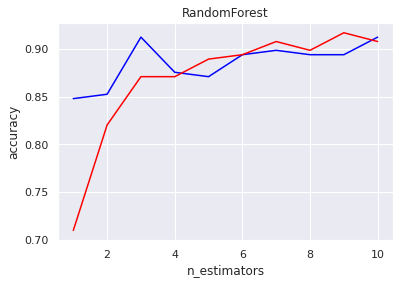

In [ ]:
#@title **verifique su respuesta**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = pd.read_csv("./misc/column_3C.csv", sep=",")
clases = {'Hernia': 1, 'Spondylolisthesis': 2, 'Normal': 3}
d.clases = [clases[item] for item in d.clases]
vals = np.random.permutation(d.values)

estimator, mean_ne, mean_d = fun_31012521(vals)

plt.plot(range(1,11), mean_ne, color="blue")
plt.plot(range(1,11), mean_d, color="red")
plt.xlabel("n_estimators");plt.ylabel("accuracy")
plt.title("RandomForest")

In [ ]:
#@title **Evalue su respuesta.**

!./run CHECK_SOLUTION PS3_31012521 $src_31012521

evaluation result CORRECT


# **Ejercicio 2: Leave-one-out**  <a name="eje2"></a>

El dataset de lesiones de columna, presenta relativamente pocos ejemplos, por lo que una partición grande para el test puede incurrir en un aprendizaje debil (pocos datos de entrenamiento). Vamos a implementar una función que realice un esquema de validación **leave-one-out**, por lo tanto desarrolle una función que: 

- Utilice la clase `LeaveOneOut` de sklearn
- Como clasificador utilice un Naive Gaussian Bayes
- La función debe devolver el número de entrenamientos realizados
- El valor general de "accuracy" tanto en **entrenamiento**, como en **test**. 



In [ ]:
#@title **2172969**
#@ markdown No modifique las dos últimas lineas

def fun_32012521(vals):
  import numpy as np
  from sklearn.naive_bayes import GaussianNB
  from sklearn.model_selection import LeaveOneOut
  from sklearn.metrics import accuracy_score
 
  np.random.seed(23)
  #Se separan el data y el target
  X = vals[:,:-1]
  y = vals[:,-1]

  est = GaussianNB()
  LOO = LeaveOneOut()
  
  train_acc, test_acc   = [], []

  for train_index, test_index in LOO.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    est.fit(X_train,y_train)
    train_acc.append(accuracy_score(y_train,est.predict(X_train)))
    test_acc.append(accuracy_score(y_test,est.predict(X_test)))
  
  
  splits =LOO.get_n_splits(X)
  trainT_acc = np.mean(train_acc)
  testT_acc = np.mean(test_acc)

  return splits, trainT_acc, testT_acc

import urllib.parse, inspect
src32012521 = urllib.parse.quote_plus(inspect.getsource(fun_32012521))


In [ ]:
#@title **verifique su respuesta**
import pandas as pd
import numpy as np


d = pd.read_csv("./misc/column_3C.csv",sep=",")
clases = {'Hernia': 1, 'Spondylolisthesis': 2, 'Normal': 3}
d.clases = [clases[item] for item in d.clases]
vals = np.random.permutation(d.values)
print("tamaño del dataset: ", vals.shape)
splits, acc_train, acc_test  = fun_32012521(vals)
print("splits: ", splits, " acc train: ", acc_train, " acc test: ", acc_test )

tamaño del dataset:  (310, 7)
splits:  310  acc train:  0.8384695688485229  acc test:  0.8290322580645161


In [ ]:
#@title **Evalue su respuesta.**

!./run CHECK_SOLUTION PS3_32012521 $src32012521 

evaluation result CORRECT


---
## **Dataset de Fallas cardiacas**

En los siguientes puntos vamos a explorar un dataset que contiene los datos de 299 pacientes relacionados con fallas cardiacas. Esta predicción se realiza basándose en características como "serum creatinine" (creatinina en suero), "ejection_fraction" (fracción de eyección), conteo de plaquetas, sodio en suero y otras.

[Fuente](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

---

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


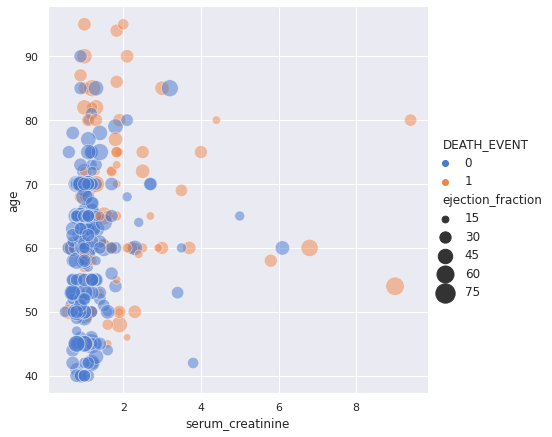

In [ ]:
#@title **Fallas cardiacas**
variable_x = "serum_creatinine" #@param {type:"string"}
variable_y = "age" #@param {type:"string"}
variable_s = "ejection_fraction" #@param {type:"string"}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()



d = pd.read_csv("./misc/heart_failure_clinical_records_dataset.csv")
vals = np.random.permutation(d.values)

sns.relplot(x=variable_x, y=variable_y, hue="DEATH_EVENT", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=d)

print(d.shape)
d.head(2)

# **Ejercicio 3: Algoritmo de clasificación _DecisionTreeClassifier_**  <a name="eje3"></a>

Realizaremos la clasificación de fallas cardiacas con un Decision Tree Classifier. [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). En este caso, la tarea de clasificación será **predecir si los pacientes tuvieron complicaciones fatales o no** {"DEATH_EVENT"}. Entonces debe construir una función que: 

- Utilice como validación la clase `StratifiedKFold`, que permite hacer particiones como un Kfold cross validation pero **preservando** las proporciones de las clases lo mejor posible. Fije el `StratifiedKFold` con `n_splits`=5. 

- Utilice en cada fold un `DecisionTreeClassifier` como estimador con parámetros `max_depth=50` y `criterion="gini"`. 

- La función debe retornar el accuracy promedio obtenido en los cinco experimentos tanto en entrenamiento como en test. 

In [ ]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def fun_33012521(vals):
  import numpy as np
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import accuracy_score
  np.random.seed(23)

  X = vals[:,:-1]
  y = vals[:,-1]
  
  skf = StratifiedKFold(n_splits=5)
  DT = DecisionTreeClassifier(max_depth=50, criterion="gini")

  train_acc, test_acc   = [], []

  for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    DT.fit(X_train,y_train)
    train_acc.append(accuracy_score(y_train,DT.predict(X_train)))
    test_acc.append(accuracy_score(y_test,DT.predict(X_test)))

  

  return  np.mean(train_acc), np.mean(test_acc)


import urllib.parse, inspect
src_33012521 = urllib.parse.quote_plus(inspect.getsource(fun_33012521))

In [ ]:
#@title **verifique su respuesta**
import pandas as pd
import numpy as np

np.random.seed(23)
print("tamaño del dataset: ", vals.shape)
acc_train, acc_test  = fun_33012521(vals)
print(" acc train: ", acc_train, " acc test: ", acc_test )

tamaño del dataset:  (299, 13)
 acc train:  1.0  acc test:  0.7656497175141243


In [ ]:
#@title **Evalue su respuesta.**

!./run CHECK_SOLUTION PS3_33012521 $src_33012521

p3
evaluation result CORRECT


# **Pasos Finales.**


#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#@title **1. Complete la siguiente información:**
taller_name = "Taller_prof_03_20202" #@param {type:"string"}
codigo_name = "tl3_2172969" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

Taller_prof_03_20202 tl3_2172969


In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

uno: tl3_2172969 dos Taller_prof_03_20202
cp: cannot stat 'Taller_prof_03_20202.ipynb': No such file or directory
ERROR!: NO FUE POSIBLE CREAR EL ARCHIVO!.


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>